In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gzzzzzzzz/y
/kaggle/input/gzzzzzzzz/X/X
/kaggle/input/fraudulent-transactions-prediction/Fraud.csv


In [7]:
df=pd.read_csv('/kaggle/input/fraudulent-transactions-prediction/Fraud.csv')

In [5]:
!mkdir train
!mkdir test

Archive:  /kaggle/input/gzzzzzzzz/X/X
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /kaggle/input/gzzzzzzzz/X/X or
        /kaggle/input/gzzzzzzzz/X/X.zip, and cannot find /kaggle/input/gzzzzzzzz/X/X.ZIP, period.


In [6]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
     

from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
import matplotlib.pylab as plt
from scipy import interp
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve,auc


**Highly Imbalanced dataset, SMOTE may be required**

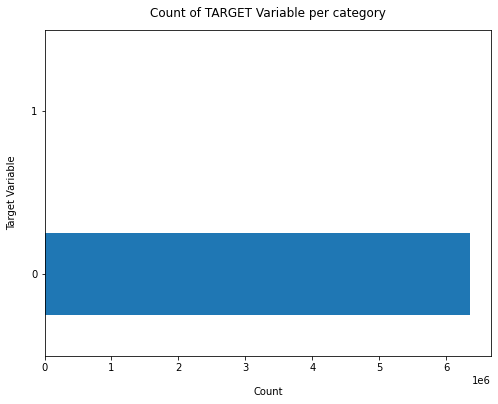

In [9]:

df['isFraud'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category",y=1.02);

In [10]:
100*df['isFraud'].value_counts()/len(df['isFraud'])


0    99.870918
1     0.129082
Name: isFraud, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


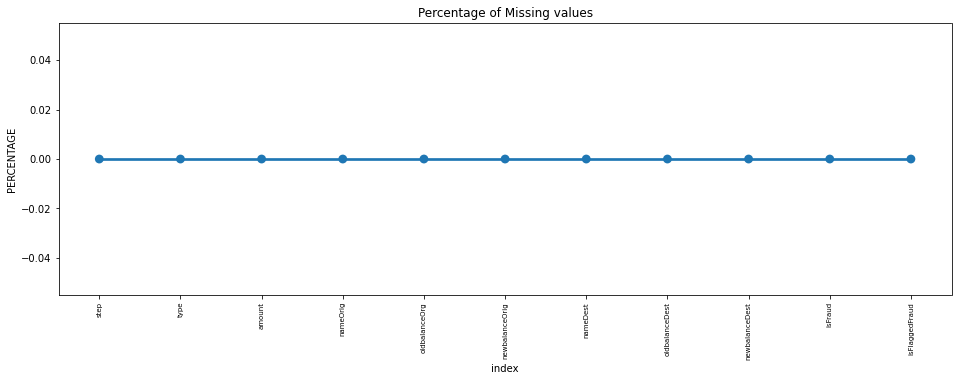

In [11]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()


In [12]:
df.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [13]:
target='isFraud'
     

In [14]:
df[df[target]==1].head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


# FEATURE EXTRACTION

In [15]:
100*df[df[target]==1].newbalanceOrig.value_counts()/len(df[df[target]==1].newbalanceOrig)


0.00           98.051869
17316255.05     0.036527
10399045.08     0.036527
19585040.37     0.036527
4953893.08      0.024352
                 ...    
34892193.09     0.012176
1975271.77      0.012176
11975271.77     0.012176
1653144.10      0.012176
29585040.37     0.012176
Name: newbalanceOrig, Length: 145, dtype: float64

In [16]:
145/len(df[df[target]==1])


0.017654937294533057

In [17]:
100*df[df[target]==1].newbalanceDest.value_counts()/len(df[df[target]==1].newbalanceDest)


0.00           49.811275
10000000.00     0.645318
1064995.85      0.024352
127905.82       0.024352
1165187.89      0.024352
                 ...    
3098931.52      0.012176
143526.32       0.012176
1532241.85      0.012176
495991.64       0.012176
7360101.63      0.012176
Name: newbalanceDest, Length: 4067, dtype: float64

In [18]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [19]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [20]:
100*df[df[target]==1].type.value_counts()/len(df[df[target]==1].type)


CASH_OUT    50.11567
TRANSFER    49.88433
Name: type, dtype: float64

In [21]:
100*df[df[target]==1].isFlaggedFraud.value_counts()/len(df[df[target]==1].isFlaggedFraud)


0    99.805187
1     0.194813
Name: isFlaggedFraud, dtype: float64

# KDE PLOTS FOR FEATURES

Text(0.5, 1.0, 'Total amount by fraud')

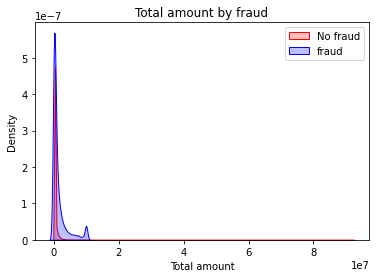

In [22]:

Tot = sns.kdeplot(df.amount[(df[target] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df.amount[(df[target] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No fraud","fraud"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total amount')
Tot.set_title('Total amount by fraud')
     


Text(0.5, 1.0, 'Total oldbalanceorigin by fraud')

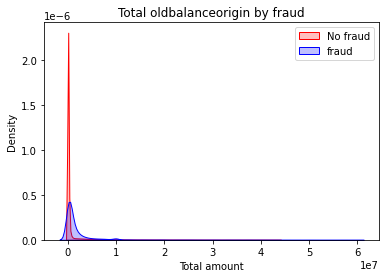

In [23]:
Tot = sns.kdeplot(df.oldbalanceOrg[(df[target] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df.oldbalanceOrg[(df[target] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No fraud","fraud"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total amount')
Tot.set_title('Total oldbalanceorigin by fraud')

Text(0.5, 1.0, 'Total newbalanceorigin by fraud')

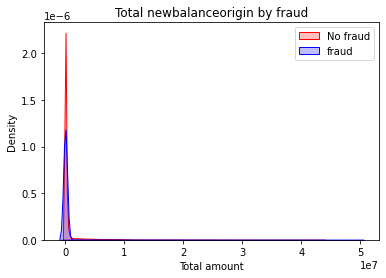

In [24]:
Tot = sns.kdeplot(df.newbalanceOrig [(df[target] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df.newbalanceOrig [(df[target] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No fraud","fraud"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total amount')
Tot.set_title('Total newbalanceorigin by fraud')

Text(0.5, 1.0, 'Total oldbalancedestination by fraud')

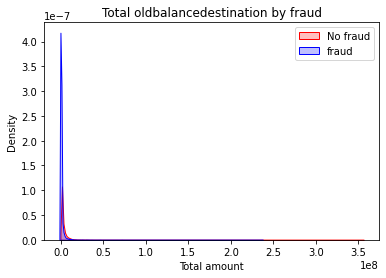

In [25]:
Tot = sns.kdeplot(df.oldbalanceDest[(df[target] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df.oldbalanceDest[(df[target] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No fraud","fraud"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total amount')
Tot.set_title('Total oldbalancedestination by fraud')

Text(0.5, 1.0, 'Total newbalancedestination by fraud')

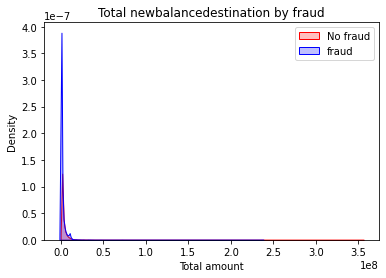

In [26]:
Tot = sns.kdeplot(df.newbalanceDest [(df[target] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df.newbalanceDest [(df[target] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No fraud","fraud"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total amount')
Tot.set_title('Total newbalancedestination by fraud')

# FEATURE ENGINEERING

In [8]:
df['dest_increase'] = (df['newbalanceDest']- df['oldbalanceDest']).values
df['origin_bal_change'] = (df['oldbalanceOrg'] - df['newbalanceOrig']).values


In [9]:
gg = (df['newbalanceOrig']==0.0) & (df['origin_bal_change']==df['amount'])
df['possible_fraud'] = 0
df.loc[gg,'possible_fraud'] = 1
df[df['possible_fraud']==1].head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,dest_increase,origin_bal_change,possible_fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0,0.00,181.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0,-21182.00,181.00,1
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1,0,0.00,2806.00,1
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1,0,-26202.00,2806.00,1
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1,0,0.00,20128.00,1
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1,0,5877.85,20128.00,1
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.00,1,0,0.00,1277212.77,1
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1,0,2444985.19,1277212.77,1
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.00,1,0,0.00,35063.63,1
1116,1,CASH_OUT,35063.63,C1635772897,35063.63,0.0,C1983025922,31140.0,7550.03,1,0,-23589.97,35063.63,1


In [10]:
gg1 = (df['dest_increase']==0.0) & (df['amount']>0)
gg2 = gg1 & ((df['dest_increase']!=df['amount']) & (df['isFlaggedFraud']==0) & (df['possible_fraud']==0))
df['possible_fraud2'] = 0
df.loc[gg2,'possible_fraud2'] = 1

In [11]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,dest_increase,origin_bal_change,possible_fraud,possible_fraud2
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0.00,9839.64,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0.00,1864.28,0,1
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0.00,181.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,-21182.00,181.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0.00,11668.14,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,339682.13,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0.00,6311409.28,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,6311409.27,6311409.28,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0.00,850002.52,1,0


In [12]:
df=df.drop(['step','nameDest','nameOrig'],axis=1)

In [13]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [14]:
new_data = { "CASH_OUT":1,
             "TRANSFER":1,
             "CASH_IN":0,
             "DEBIT":0,
            "PAYMENT":0,
              
            
           }

In [15]:
df['type'] = df['type'].map(new_data)



In [35]:
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,dest_increase,origin_bal_change,possible_fraud,possible_fraud2
0,0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0.00,9839.64,0,1
1,0,1864.28,21249.00,19384.72,0.00,0.00,0,0,0.00,1864.28,0,1
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0.00,181.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,-21182.00,181.00,1,0
4,0,11668.14,41554.00,29885.86,0.00,0.00,0,0,0.00,11668.14,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1,339682.13,339682.13,0.00,0.00,339682.13,1,0,339682.13,339682.13,1,0
6362616,1,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0.00,6311409.28,1,0
6362617,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,6311409.27,6311409.28,1,0
6362618,1,850002.52,850002.52,0.00,0.00,0.00,1,0,0.00,850002.52,1,0


scaling

In [16]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [17]:

scaled = scaler.fit_transform(df)
scaled=pd.DataFrame(scaled,columns=df.columns)

In [18]:
scaled

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,dest_increase,origin_bal_change,possible_fraud,possible_fraud2
0,0.0,0.000106,0.002855,0.003233,0.000000,0.000000,0.0,0.0,0.109987,0.161566,0.0,1.0
1,0.0,0.000020,0.000357,0.000391,0.000000,0.000000,0.0,0.0,0.109987,0.160897,0.0,1.0
2,1.0,0.000002,0.000003,0.000000,0.000000,0.000000,1.0,0.0,0.109987,0.160756,1.0,0.0
3,1.0,0.000002,0.000003,0.000000,0.000059,0.000000,1.0,0.0,0.109809,0.160756,1.0,0.0
4,0.0,0.000126,0.000697,0.000603,0.000000,0.000000,0.0,0.0,0.109987,0.161720,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.000000,0.000000,0.000954,1.0,0.0,0.112848,0.189249,1.0,0.0
6362616,1.0,0.068272,0.105923,0.000000,0.000000,0.000000,1.0,0.0,0.109987,0.690432,1.0,0.0
6362617,1.0,0.068272,0.105923,0.000000,0.000192,0.017912,1.0,0.0,0.163136,0.690432,1.0,0.0
6362618,1.0,0.009195,0.014265,0.000000,0.000000,0.000000,1.0,0.0,0.109987,0.232078,1.0,0.0


In [19]:
X = scaled.drop('isFraud',1) 
y = scaled.isFraud

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [20]:
X['isFlaggedFraud']=X['isFlaggedFraud'].astype(int)


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [22]:
X['possible_fraud']=X['possible_fraud'].astype(int)
X['possible_fraud2']=X['possible_fraud2'].astype(int)
X['type']=X['type'].astype(int)
y=y.astype(int)


In [44]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

/opt/conda/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [45]:
vif_data

,feature,VIF
0,type,3.204350
1,amount,3.856162
2,oldbalanceOrg,inf
3,newbalanceOrig,inf
4,oldbalanceDest,inf
5,newbalanceDest,inf
6,isFlaggedFraud,1.000636
7,dest_increase,inf
8,origin_bal_change,inf
9,possible_fraud,1.158136


In [23]:
X=X.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','dest_increase'],axis=1)

## **Model building**
* LogisticRegression 
* RandomForestClassifier

In [24]:

from sklearn.model_selection import train_test_split
     

from sklearn.linear_model import LogisticRegression 
import sklearn.metrics as metrics


In [25]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve


In [26]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X,y ,test_size =0.2,shuffle=True)


In [27]:
model1=LogisticRegression()

model1.fit(x_train1,y_train1)

LogisticRegression()

In [28]:

pred_cv1 = model1.predict(x_test1)
accuracy_score(y_test1,pred_cv1)

0.9999960708010223

### **excellent results for minority class**

In [29]:
print(classification_report(y_test1, pred_cv1, labels=[0,1]))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270900
           1       1.00      1.00      1.00      1624

    accuracy                           1.00   1272524
   macro avg       1.00      1.00      1.00   1272524
weighted avg       1.00      1.00      1.00   1272524



In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train1, y_train1)


RandomForestClassifier(max_depth=2, random_state=0)

In [32]:
pred_cv2 = clf.predict(x_test1)
accuracy_score(y_test1,pred_cv2)

0.9999960708010223

In [33]:
print(classification_report(y_test1, pred_cv2, labels=[0,1]))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270900
           1       1.00      1.00      1.00      1624

    accuracy                           1.00   1272524
   macro avg       1.00      1.00      1.00   1272524
weighted avg       1.00      1.00      1.00   1272524



# FEATURE IMPORTANCE

In [53]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train1, y_train1)
mutual_info

array([1.11103922e-01, 2.06503908e-03, 1.33463454e-05, 2.83738126e-02,
       9.52538864e-03, 9.63757794e-02])

In [54]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train1.columns
mutual_info.sort_values(ascending=False)

type                 0.111104
possible_fraud2      0.096376
origin_bal_change    0.028374
possible_fraud       0.009525
amount               0.002065
isFlaggedFraud       0.000013
dtype: float64

<AxesSubplot:>

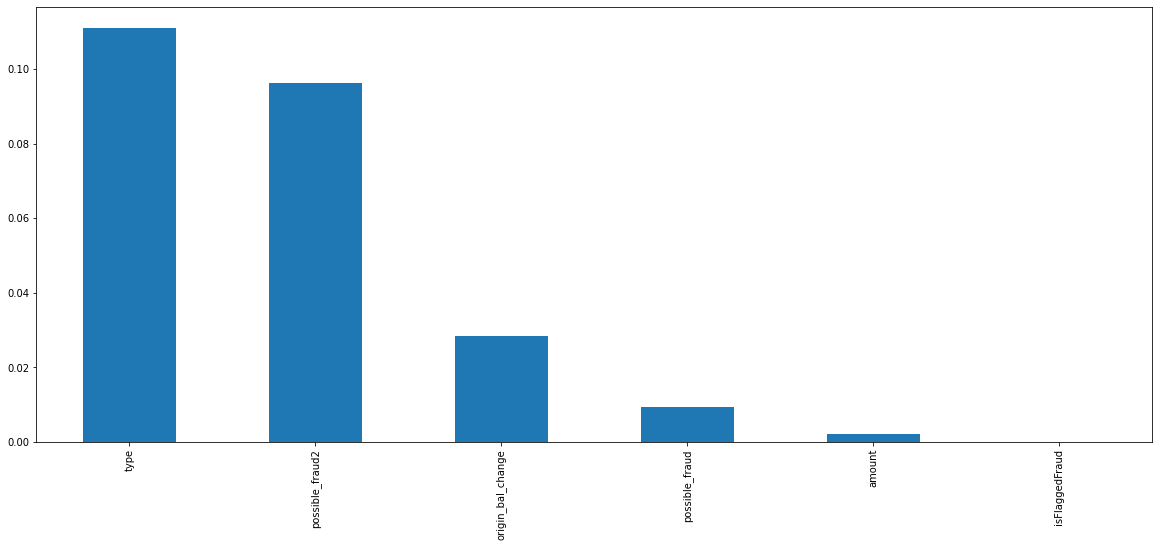

In [55]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


### **auc curve and confusion matrix**

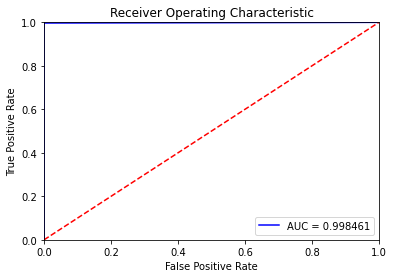

In [37]:
fpr, tpr, threshold = metrics.roc_curve(y_test1, pred_cv1)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.6f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [41]:

def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    print('True Negatives: ', cm[0][0])
    print('False Positives: ', cm[0][1])
    print('False Negatives: ', cm[1][0])
    print('True Positives: ', cm[1][1])



FOR LOGISTIC REGRESSION

True Negatives:  1270900
False Positives:  0
False Negatives:  5
True Positives:  1619


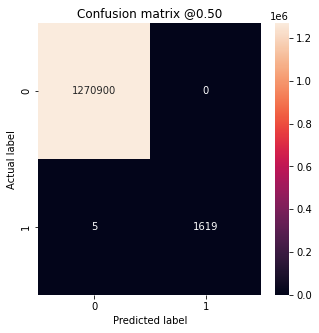

In [42]:

plot_cm(y_test1, pred_cv1)

FOR RANDOMFORESTCLASSIFIER

True Negatives:  1270900
False Positives:  0
False Negatives:  5
True Positives:  1619


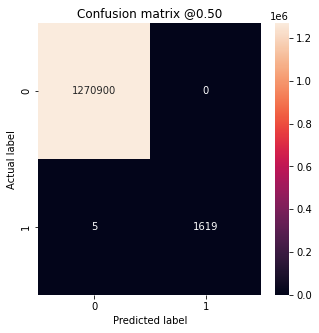

In [43]:
plot_cm(y_test1, pred_cv2)

In [55]:

from sklearn.metrics import auc

### **PR Curve**

Logistic: f1=0.998 auc=0.998


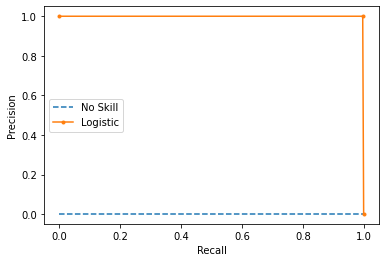

In [60]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test1, pred_cv1)
# calculate scores
lr_f1, lr_auc = f1_score(y_test1, pred_cv1), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test1[y_test1==1]) / len(y_test1)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# Q&A

> QUESTIONS TO ANSWER
1. Data cleaning including missing values, outliers and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools.
5. What are the key factors that predict fraudulent customer?
6. Do these factors make sense? If yes, How? If not, How not?
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?

1. Dataset contains no missing values, but after feature engineering vif of few features was very high so I use VIF to remove them.
2. This will answered by combining all of answers of this question will be answered by following answers.
3. I bascially dropped thew columns which doesnt provide any information gain and have very high VIF ( variance influence factor), apart from that I performed feature engineering and lastly took all the columns which got left.
4. I have provided various metrics, as accuracy is not a good metric for imbalanced dataset , I have provide classification reports which provide precision,recall anf F1 score(recommended for imbalanced dataset).
5. I have performed the process of feature importance by using mututal information,Mutual Information measures the entropy drops under the condition of the target value. by that I found the most imortant fearures are following in decreasing importance or information gain:
* type 
* possible_fraud2     
* origin_bal_change   
* possible_fraud       
* amount              
* isFlaggedFraud


6.  **Type**: I performed feature engineering on feature TYPE, what I found was that the proproptions of fraud transactions when looked in terms of unique values in column type (which is basically column        for transaction type) is only given by two types of transaction CASH_OUT (50.11567) TRANSFER (49.88433), what that means is all fraud transactions are  either cash_out or transfer of amount to              different account which makes sense as fraud transaction will be done either taking fraud money out from someone's account or transferring it to diffferent account.
     I mapped 1 to both cash_out and transfer and 0 to other values , so basically I weighted them and give more preference for genuine reason.
    
    **origin_bal_change**: In fraudulent transactions, the origin account is completely emptied out (almost), so this feature provides a unique perspective about fraudlent transactions and its also be seen      by the kernel density plot for newbalanceorigin.
    it also makes sense as no one empty their account during any transaction, empyting account can lead to expiration of the account itself, so it clearly implies their is fraudlent transaction.
    
    **possible_fraud**: this feature again was made during feature engineering, this feature bascially consider those transaction which involve emptying the originaccount balance as we have seen that in         fraudlent transaction this is prominent so I have marked 1 all such transcations.
    
    **possible_fraud2**: this feature takes account the fact that in fraudulent transactions, the newbalance in the destination account does not increase at all, the change is 0 , I have marked all those 
    transaction as 1 which are not previosly marked as 1 by possible fraud feature and isFlaggedFraud so that we can gain new information and multicollinearaity remain distant. This can be seen by KDE Plot     clearly.
    
    **amount**: In KDE Plot for amount we can see that when transaction amount increases the number of fraudlent transaction also increases, not only that at bveyond certain amounts (2x10^^) the fraudlent       transaction are significantly higher than non fraud transactions which makes sense as fraudlentr transction usally involve large sums of money.
    
The rest features have no strong reason for their relationships

7. The company should contact the account holder as soon as the transaction amount crosses 30% of their balance in account and should not let them totally empty their account, by that they can significantly    decrease fraudlent transaction.
8. To check the efficiency of step above take, they can first all check the number of fraudlent transaction further they can run a model like this and check the feature importance, if the feature importance of features which were considered during decision making decreasing that means that feature did its work and rest fraudlent transactoin have no significant relationship with that feature and futher they can check other features and take steps accordinly.